# Pymaceuticals Inc.
***
## Analysis
* Add analysis here
***

## Prepare the Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Specify data file paths
mouse_metadata_path = "C:/Users/adina/Desktop/Classwork/Module 5 Data Visualization/Module 5 Challenge/matplotlib-challenge/Resources/Mouse_metadata.csv"
study_results_path = "C:/Users/adina/Desktop/Classwork/Module 5 Data Visualization/Module 5 Challenge/matplotlib-challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data_notclean = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
all_data_notclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice
all_data_notclean['Mouse ID'].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Check for any mouse ID with duplicate time points

# Check number of timepoints (10)
all_data_notclean['Timepoint'].value_counts()

# Check number of "0" timepoints and compare against number of unique mouse IDs (250 vs 249)
all_data_notclean.loc[all_data_notclean['Timepoint']==0].count()

# Because there are only 10 unique time points, and Mouse g989 has 13 rows in the spreadsheet, that mouse has duplicates
# Confirm this by showing all rows for Mouse g989
all_data_notclean.loc[all_data_notclean['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
all_data = all_data_notclean.loc[all_data_notclean['Mouse ID']!='g989']

In [91]:
# Confirm new number of mice
all_data['Mouse ID'].value_counts()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
66,k403,0,45.000000,0,Ramicane,Male,21,16
477,k403,5,38.825898,0,Ramicane,Male,21,16
654,k403,10,35.014271,1,Ramicane,Male,21,16
745,k403,15,34.223992,1,Ramicane,Male,21,16
1034,k403,20,32.997729,1,Ramicane,Male,21,16
1217,k403,25,33.464577,1,Ramicane,Male,21,16
1374,k403,30,31.099498,1,Ramicane,Male,21,16
1605,k403,35,26.546993,1,Ramicane,Male,21,16
1628,k403,40,24.365505,1,Ramicane,Male,21,16
1814,k403,45,22.050126,1,Ramicane,Male,21,16


***
## Summary Statistics

In [6]:
# Create a DataFrame of summary statistics grouped by drug regimen by calculating each statistic and merging
mean = pd.DataFrame(all_data.groupby(all_data['Drug Regimen'])['Tumor Volume (mm3)'].mean())
median = pd.DataFrame(all_data.groupby(all_data['Drug Regimen'])['Tumor Volume (mm3)'].median())
variance = pd.DataFrame(all_data.groupby(all_data['Drug Regimen'])['Tumor Volume (mm3)'].var())
stdev = pd.DataFrame(all_data.groupby(all_data['Drug Regimen'])['Tumor Volume (mm3)'].std())
sem = pd.DataFrame(all_data.groupby(all_data['Drug Regimen'])['Tumor Volume (mm3)'].sem())

summary_stats_1 = mean.merge(median,on='Drug Regimen').merge(variance,on='Drug Regimen').merge(stdev,on='Drug Regimen').merge(sem,on='Drug Regimen')
summary_stats_1.columns=['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
summary_stats_1

C:\Users\adina\AppData\Local\Temp\ipykernel_1140\1765544841.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  summary_stats_1 = mean.merge(median,on='Drug Regimen').merge(variance,on='Drug Regimen').merge(stdev,on='Drug Regimen').merge(sem,on='Drug Regimen')


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Create a DataFrame of summary statistics grouped by drug regimen using the aggregate method
summary_stats_2 = all_data.groupby(all_data['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(mean='mean',median='median',var='var',std='std',sem='sem')
summary_stats_2.columns = pd.MultiIndex.from_tuples(zip(['','','Tumor Volume (mm3)','',''],summary_stats_2.columns))
summary_stats_2

Tumor Volume (mm3)                    
                   mean     median                var       std       sem
Drug Regimen                                                             
Capomulin     40.675741  41.557809          24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157          39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584          43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743          68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285          66.173479  8.134708  0.596466
Placebo       54.033581  52.288934          61.168083  7.821003  0.581331
Propriva      52.320930  50.446266          43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236          23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737          59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479          48.533355  6.966589  0.516398

***
## Bar and Pie Charts

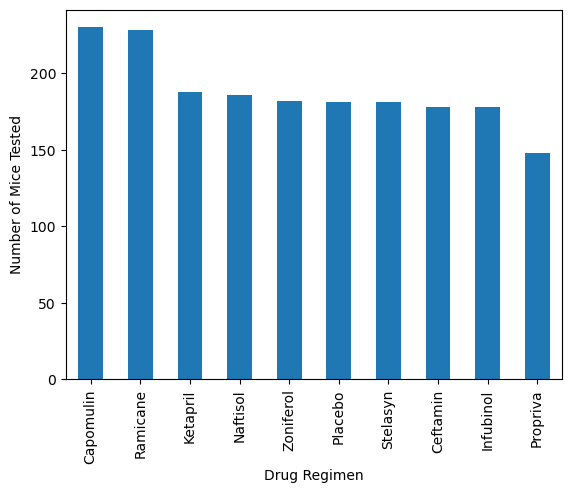

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
bar_data = pd.DataFrame(all_data.groupby(['Drug Regimen'])['Timepoint'].count())
bar_data = bar_data.sort_values(by='Timepoint', ascending=False)
bar1 = bar_data.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested', legend=None)
plt.show()

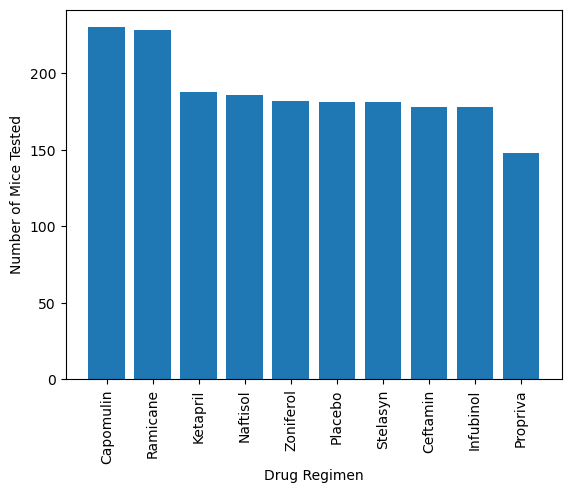

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
yaxis = all_data.groupby(['Drug Regimen'])['Timepoint'].count()
yaxis = yaxis.sort_values(ascending=False)
xaxis = range(len(yaxis))
bar_2 = plt.bar(xaxis, yaxis)
drugs = yaxis.index
tick_locations = [value for value in xaxis]
plt.xticks(tick_locations, drugs, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

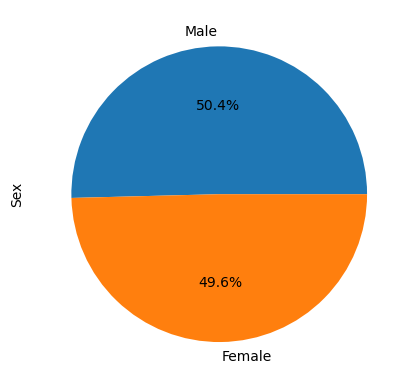

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = pd.DataFrame(all_data.groupby('Sex')['Mouse ID'].nunique())
pie_data = pie_data['Mouse ID'].sort_values(ascending=False)
pie1 = pie_data.plot(kind='pie',y='Mouse ID',autopct='%1.1f%%',legend=False,ylabel='Sex')
plt.show()

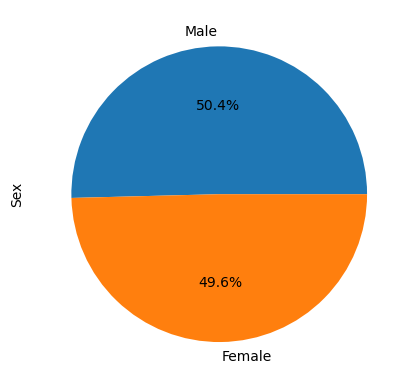

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
sexes = all_data.groupby('Sex')['Mouse ID'].nunique()
data = [sexes['Male'],sexes['Female']]
pie_2 = plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

***
## Quartiles, Outliers and Boxplots

In [208]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumors = all_data.loc[(all_data['Drug Regimen']=='Capomulin') | (all_data['Drug Regimen']=='Ramicane') | (all_data['Drug Regimen']=='Infubinol') | (all_data['Drug Regimen']=='Ceftamin')]
final_tumors = final_tumors.loc[final_tumors.groupby(['Mouse ID','Drug Regimen'])['Timepoint'].idxmax()].reset_index()
final_tumors.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1804,a203,45,67.973419,2,Infubinol,Female,20,23
1,1786,a251,45,65.525743,1,Infubinol,Female,21,25
2,1856,a275,45,62.999356,3,Ceftamin,Female,20,28
3,1773,a411,45,38.407618,1,Ramicane,Male,3,22
4,1836,a444,45,43.047543,0,Ramicane,Female,10,25


In [201]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = dict([(drug,[]) for drug in treatments])

for x in range(len(final_tumors)):
    for y in treatments:
        if final_tumors.loc[x,'Drug Regimen'] == y:
            tumor_vol[y].append(final_tumors.loc[x,'Tumor Volume (mm3)'])
            
for drug in treatments:
    tumor_vol_calc = pd.Series(tumor_vol[drug][:])
    quartiles = tumor_vol_calc.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_calc.loc[(tumor_vol_calc < lower_bound) | (tumor_vol_calc > upper_bound)]   
    if outliers.empty == True:
        print(f'For {drug}, the lower bound is {round(lower_bound,2)} and the upper bound is {round(upper_bound,2)}. There are no outliers.')
    else:
        print(f'For {drug}, the lower bound is {round(lower_bound,2)} and the upper bound is {round(upper_bound,2)}. The outliers are: {(outliers.values).round(2)}.')
    

For Capomulin, the lower bound is 20.7 and the upper bound is 51.83. There are no outliers.
For Ramicane, the lower bound is 17.91 and the upper bound is 54.31. There are no outliers.
For Infubinol, the lower bound is 36.83 and the upper bound is 82.74. The outliers are: [36.32].
For Ceftamin, the lower bound is 25.36 and the upper bound is 87.67. There are no outliers.


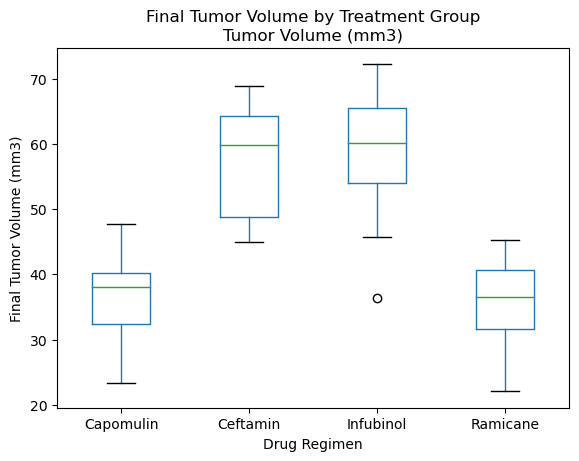

In [235]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
fig = final_tumors.boxplot(by='Drug Regimen',column='Tumor Volume (mm3)',grid=False)
fig.get_figure().suptitle('Final Tumor Volume by Treatment Group')
fig.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

***
## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


***
## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
